In [11]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [38]:
%matplotlib inline

In [13]:
print('21')

21


In [14]:
import zipfile

In [15]:
zipfile.ZipFile('File/names.zip').extractall('File/names')
# uncompress the zip archive into File/name directory

In [16]:
open('File/names/yob2015.txt', 'r').readlines()[:5]

['Emma,F,20455\n',
 'Olivia,F,19691\n',
 'Sophia,F,17417\n',
 'Ava,F,16378\n',
 'Isabella,F,15617\n']

In [17]:
names2015 = pd.read_csv('File/names/yob2015.txt', names = ['Name', 'Sex', 'Babies'])

In [18]:
names2015.head()

,Name,Sex,Babies
0,Emma,F,20455
1,Olivia,F,19691
2,Sophia,F,17417
3,Ava,F,16378
4,Isabella,F,15617


In [19]:
all_years = []

In [22]:
for year in range(1880, 2015+1):
    all_years.append(pd.read_csv('File/names/yob{}.txt'.format(year),
                                names = ['Name', 'Sex', 'Babies']))
    all_years[-1]['Year'] = year

In [24]:
all_names = pd.concat(all_years)

In [25]:
all_years

[           Name Sex  Babies
 0          Mary   F    7065
 1          Anna   F    2604
 2          Emma   F    2003
 3     Elizabeth   F    1939
 4        Minnie   F    1746
 ...         ...  ..     ...
 1995     Woodie   M       5
 1996     Worthy   M       5
 1997     Wright   M       5
 1998       York   M       5
 1999  Zachariah   M       5
 
 [2000 rows x 3 columns],
            Name Sex  Babies  Year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],
            Name Sex  Babies  Year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 

In [26]:
all_names

,Name,Sex,Babies,Year
0,Mary,F,7065,NaN
1,Anna,F,2604,NaN
2,Emma,F,2003,NaN
3,Elizabeth,F,1939,NaN
4,Minnie,F,1746,NaN
...,...,...,...,...
33116,Zykell,M,5,2015.0
33117,Zyking,M,5,2015.0
33118,Zykir,M,5,2015.0
33119,Zyrus,M,5,2015.0


In [27]:
group_name = all_names.groupby(['Sex', 'Year'])

In [28]:
group_name.size()
# how many female and male names there were for each year

Sex  Year  
F    1880.0      942
     1881.0      938
     1882.0     1028
     1883.0     1054
     1884.0     1172
               ...  
M    2011.0    14345
     2012.0    14238
     2013.0    14041
     2014.0    14052
     2015.0    14030
Length: 272, dtype: int64

In [29]:
group_name.size().unstack()
# more readable view

Year,1880.0,1881.0,1882.0,1883.0,1884.0,1885.0,1886.0,1887.0,1888.0,1889.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Sex,,,,,,,,,,,,,,,,,,,,,
F,942,938,1028,1054,1172,1197,1282,1306,1474,1479,...,20053,20568,20464,20183,19815,19563,19509,19241,19191,19091
M,1058,997,1099,1030,1125,1097,1110,1067,1177,1111,...,14035,14393,14615,14526,14258,14345,14238,14041,14052,14030


In [31]:
names2015.groupby(['Sex']).sum()

,Babies
Sex,
F,1780453
M,1911537


In [32]:
pd.pivot_table(all_names, 'Babies', 'Name', 'Year')

Year,1880.0,1881.0,1882.0,1883.0,1884.0,1885.0,1886.0,1887.0,1888.0,1889.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Name,,,,,,,,,,,,,,,,,,,,,
Aaban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,6.0,9.0,11.0,11.0,14.0,16.0,15.0
Aabha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,5.0,NaN,9.0,7.0
Aabid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabriella,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0
Aada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
Zyvon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
Zyyanna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN


In [33]:
pd.pivot_table(all_names, 'Babies', ['Name', 'Year'])

Babies
Name    Year          
Aaban   2007.0     5.0
        2009.0     6.0
        2010.0     9.0
        2011.0    11.0
        2012.0    11.0
...                ...
Zyvion  2009.0     5.0
Zyvon   2015.0     7.0
Zyyanna 2010.0     6.0
Zyyon   2014.0     6.0
Zzyzx   2010.0     5.0

[1696160 rows x 1 columns]

In [34]:
pd.pivot_table(all_names, 'Babies', ['Name', 'Sex'], 'Year')

,Year,1880.0,1881.0,1882.0,1883.0,1884.0,1885.0,1886.0,1887.0,1888.0,1889.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Name,Sex,,,,,,,,,,,,,,,,,,,,,
Aaban,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,6.0,9.0,11.0,11.0,14.0,16.0,15.0
Aabha,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,5.0,NaN,9.0,7.0
Aabid,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabriella,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0
Aada,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
Zyvon,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
Zyyanna,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN


In [35]:
all_names_index = all_names.set_index(['Sex', 'Name', 'Year']).sort_index()

In [36]:
all_names_index

Babies
Sex Name      Year          
F   Aabha     2011.0       7
              2012.0       5
              2014.0       9
              2015.0       7
    Aabriella 2008.0       5
...                      ...
M   Zyus      2015.0       5
    Zyvion    2009.0       5
    Zyvon     2015.0       7
    Zyyon     2014.0       6
    Zzyzx     2010.0       5

[1861413 rows x 1 columns]

In [41]:
def name_plot(sex, name):
    """function that will plot the popularity of a name over time"""
    data = all_names_index.loc[sex, name]
    
    pp.plot(data.index, data.values)

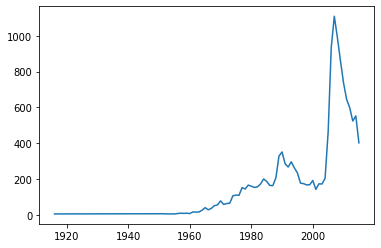

In [42]:
name_plot('F', 'Danica')
# Looking at the visualization, we can see that the female name Danica had a 
# small rise in popularity around 1990, and peaked just before 2010.

In [43]:
pp.figure(figsize = (18, 8))

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [49]:
names = ['Sammy', 'Jesse', 'Drew', 'Ivanna']

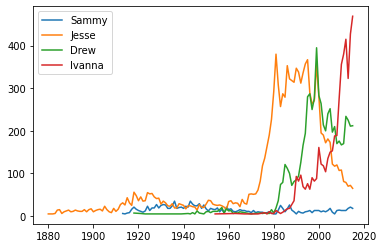

In [51]:
for name in names:
    name_plot('F', name)

pp.legend(names)
# add legend to the our plot

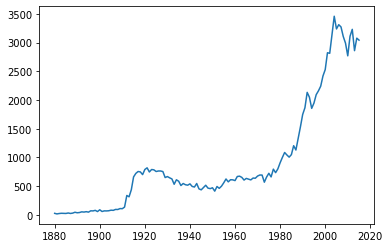

In [47]:
name_plot('M', 'Ivan')